#**CLEAN DATA**

##**Merge raw_data files into one dataframe**

In [38]:
import pandas as pd

raw_data_files = [pd.read_csv('/content/dongho_dana.csv'),
                  pd.read_csv('/content/dongho_dangquang.csv'),
                  pd.read_csv('/content/dongho_haitrieu.csv'),]

data = pd.concat(raw_data_files, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            3053 non-null   object
 1   Gender          3047 non-null   object
 2   Face_Diameter   3047 non-null   object
 3   Glass_material  3045 non-null   object
 4   Wire_material   2878 non-null   object
 5   Apparatus       3054 non-null   object
 6   Waterproof      3049 non-null   object
 7   Origin          3049 non-null   object
 8   agency          3054 non-null   object
 9   Price           3057 non-null   object
dtypes: object(10)
memory usage: 239.0+ KB


##**Missing data**

In [39]:
missing_data_count = data.isnull().sum()
print(missing_data_count)

name                4
Gender             10
Face_Diameter      10
Glass_material     12
Wire_material     179
Apparatus           3
Waterproof          8
Origin              8
agency              3
Price               0
dtype: int64


<Axes: >

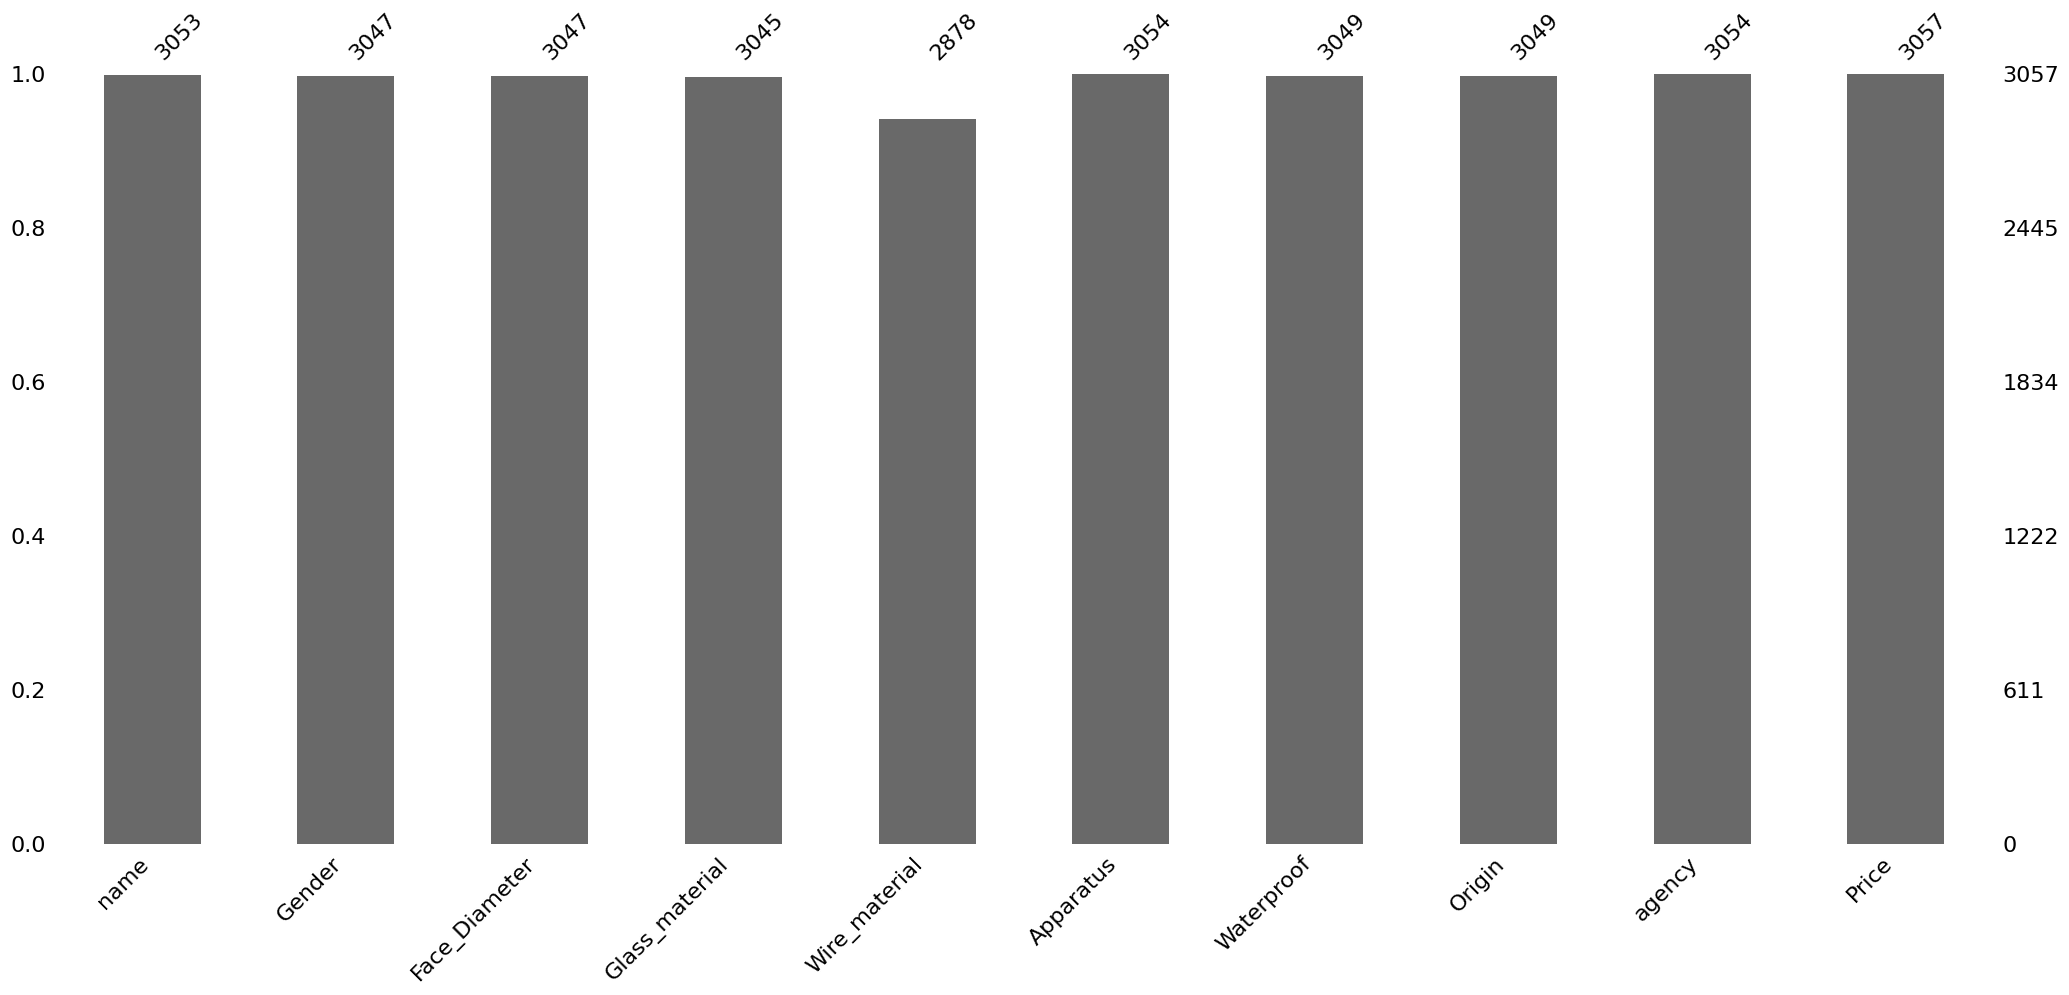

In [40]:
import missingno as msno

msno.bar(data)

##**Diameter**

In [41]:
data['face_Diameter'] = data['Face_Diameter'].copy() # Creating a copy of RAM
data['face_Diameter'].unique()

print(data['face_Diameter'])

0        45.4mm
1        45.4mm
2       45.4 mm
3        45.4mm
4       45.4 mm
         ...   
3052      40 mm
3053       38mm
3054       38mm
3055       49mm
3056       45mm
Name: face_Diameter, Length: 3057, dtype: object


In [42]:
import random
import re
diameter = []
for i in data['face_Diameter'] :
  i = str(i).lower().replace(',','.')
  i = re.sub(r"\s+", "", i)
  if 'nan' in i :
    random_number = random.uniform(39, 42)
    rounded_number = round(random_number, 1)
    diameter.append(rounded_number)
   
 
  elif 'x'  in i :
    diameter.append(i.split('x')[0].replace('mm',''))

  elif '×' in i :
    diameter.append(i.split('×')[0].replace('mm',''))
  elif '*' in i :
    diameter.append(i.split('*')[0].replace('mm',''))
   
  else :
    diameter.append(i.replace('mm',''))
    


In [43]:
print("Kich thuoc" , len(diameter))

Kich thuoc 3057


#**Glass Material**

In [44]:
data['glass_material'] = data['Glass_material'].copy() # Creating a copy of RAM
data['glass_material'].unique()

print(data['glass_material'])

0             khoáng (Mineral Glass)
1             khoáng (Mineral Glass)
2             khoáng (Mineral Glass)
3             khoáng (Mineral Glass)
4             khoáng (Mineral Glass)
                    ...             
3052      Sapphire (Kính Chống Trầy)
3053      Sapphire (Kính Chống Trầy)
3054      Sapphire (Kính Chống Trầy)
3055     Mineral Crystal (Kính Cứng)
3056     Mineral Crystal (Kính Cứng)
Name: glass_material, Length: 3057, dtype: object


In [45]:
Glass_material = []
glass_types =['Mineral Crystal','Sapphire Crystal','Acrylic Crystal','Hardlex Crystal',' Resin Glass']
for i in data['glass_material'] :
  i = str(i).split('(')[0]
  if 'nan' in i :
    random_number = random.randint(0, 4)
    Glass_material.append(glass_types[random_number])
  elif 'khoáng' in i.lower()   :
    Glass_material.append(glass_types[0])
  elif 'mineral' in i.lower() :
    Glass_material.append(glass_types[0])
  elif ('sapphire' in i.lower() ) or (' sappire' in i.lower()) or ('saphire' in i.lower()) :
    Glass_material.append(glass_types[1])
  elif 'nhựa' in i.lower() :
    Glass_material.append(glass_types[4])
  elif ('cứng' in i.lower()) or ( 'kínhcứngchịulực' in i.lower() )  or ('kínhcườnglực' in i.lower()):
    random_number = random.randint(0, 1)
    Glass_material.append(glass_types[random_number])
  elif 'mica' in i.lower() :
    Glass_material.append(glass_types[2])
  elif 'hardenedcrystexcrystal' in i.lower() :
    Glass_material.append('Hardened Crystex Crystal')
  elif 'perspex' in i.lower() :
    Glass_material.append('Perspex')
  else :
    Glass_material.append(i)

In [46]:
print("kich thuoc :" ,len(Glass_material))



kich thuoc : 3057


#**Wire Material**

In [47]:
data['wire_material'] = data['Wire_material'].copy() # Creating a copy of RAM
data['wire_material'].unique()

print(data['wire_material'])

0       Dây kim loại (Custom)
1       Dây kim loại (Custom)
2         Dây cao su (Custom)
3                    Dây nhựa
4         Dây cao su (Custom)
                ...          
3052        Dây Da Chính Hãng
3053            Thép Không Gỉ
3054            Thép Không Gỉ
3055                      NaN
3056                      NaN
Name: wire_material, Length: 3057, dtype: object


In [48]:
Wire_material = []
wire_types = ['dây da' ,'thép không gỉ']
for i in data['wire_material'] :
  i = str(i).split('(')[0].lower()
  if 'nan' in i :
    random_number = random.randint(0, 1)
    Wire_material.append(wire_types[random_number])
  elif 'dây da' in i :
    Wire_material.append(wire_types[0])
  elif 'nhựa' in i :
    Wire_material.append('dây nhựa')
  elif 'chất liệu vỏ' in i :
    Wire_material.append(i.replace('chất liệu vỏ',''))
  elif 'stainless steel' in i :
    Wire_material.append(wire_types[1])
  else :
    Wire_material.append(i)

In [49]:
print("kich thuoc :" ,len(Wire_material))



kich thuoc : 3057


#**Apparatus**

In [50]:
data['apparatus'] = data['Apparatus'].copy() # Creating a copy of RAM
data['apparatus'].unique()

print(data['apparatus'])

0                            Pin (Quartz)
1                            Pin (Quartz)
2                            Pin (Quartz)
3       Tough Solar (Năng lượng mặt trời)
4                            Pin (Quartz)
                      ...                
3052                         Quartz (Pin)
3053                         Quartz (Pin)
3054                         Quartz (Pin)
3055                         Quartz (Pin)
3056                         Quartz (Pin)
Name: apparatus, Length: 3057, dtype: object


In [51]:
import random
Apparatus = []
types = ['Quartz' ,'Touch Solar','Automatic']
for i in data['apparatus'] :
  i = str(i).split('(')[0]
  if 'nan' in i :
    random_number = random.randint(0, 2)
    Apparatus.append(types[random_number])
  elif ('pin' in i.lower() ) or ('quartz' in i.lower()) :
    Apparatus.append(types[0])
  elif ('lên cót' in i.lower() )  or ('handwinding' in i.lower()):
    Apparatus.append('Hand-Wound')
  elif ('cơ' in i.lower() ) or ('automatic' in i.lower()):
    Apparatus.append(types[2])
  
  elif 'solar' in i.lower() :
    Apparatus.append(types[1])
  else :
    Apparatus.append(i)

In [52]:
print("kich thuoc :" ,len(Apparatus))

kich thuoc : 3057


#**Waterproof**

In [53]:
data['waterproof'] = data['Waterproof'].copy() # Creating a copy of RAM
data['waterproof'].unique()

print(data['waterproof'])

0         20ATM
1         20ATM
2         20ATM
3         20ATM
4         20ATM
         ...   
3052      5 ATM
3053      5 ATM
3054      5 ATM
3055     10 ATM
3056      5 ATM
Name: waterproof, Length: 3057, dtype: object


In [54]:
import random
Waterproof = []

for i in data['waterproof'] :
  i = str(i).lower()
  i = re.sub(r"\s+", "", i)
  if 'nan' in i :
    random_number = random.randint(5, 10)
    Waterproof.append(random_number)
  elif 'bar' in i   :
   Waterproof.append(i.replace('bar',''))
  elif 'atm' in i:
    Waterproof.append(i.replace('atm',''))
  elif 'm' in i :
    Waterproof.append(int(i.replace('m',''))/10)
  

In [55]:
print("kich thuoc :" ,len(Waterproof))


kich thuoc : 3057


#**Origin**

In [56]:
data['origin'] = data['Origin'].copy() # Creating a copy of RAM
data['origin'].unique()

print(data['origin'])

0        Nhật Bản
1        Nhật Bản
2        Nhật Bản
3        Nhật Bản
4        Nhật Bản
          ...    
3052     Nhật Bản
3053     Nhật Bản
3054     Nhật Bản
3055     Nhật Bản
3056     Nhật Bản
Name: origin, Length: 3057, dtype: object


In [57]:
import random
Origin = []
Origin_types = ['Mỹ' ,'Nhật Bản' ,'Thụy sỹ' ,'Áo']
for i in data['origin'] :
  i = str(i).split('/')[0]
  if 'nan' in i :
    random_number = random.randint(0, 3)
    Origin.append(Origin_types[random_number])
  elif 'lắp ráp' in i.lower()   :
   Origin.append(i.replace('Lắp ráp',''))
  
  else :
    Origin.append(i)

In [58]:
print("kich thuoc :" ,len(Origin))


kich thuoc : 3057


#**Agency**

In [59]:
data['Agency'] = data['agency'].copy() # Creating a copy of RAM
data['Agency'].unique()

print(data['Agency'])

0                             Casio
1                             Casio
2                             Casio
3                             Casio
4                             Casio
                   ...             
3052     Olym Pianus (Olympia Star)
3053                         Orient
3054                         Orient
3055                          Casio
3056                          Casio
Name: Agency, Length: 3057, dtype: object


In [60]:
import random
Agency = []

for i in data['Agency'] :
  i = str(i).split('(')[0]
  if ('nan' in i) or ('nam' in i.lower()) :
    Agency.append('Casio')
  else :
    Agency.append(i)

In [61]:
print("kich thuoc :" ,len(Agency))


kich thuoc : 3057


#**Price**

In [62]:
data['price'] = data['Price'].copy() # Creating a copy of RAM
data['price'].unique()

print(data['price'])

0           5695200
1           5695200
2           5515200
3           4752000
4           5515200
           ...     
3052    4.670.000 ₫
3053    6.330.000 ₫
3054    6.330.000 ₫
3055    4.984.000 ₫
3056    1.347.000 ₫
Name: price, Length: 3057, dtype: object


In [63]:
def round_price(number) :
  last_three_digits = int(str(number)[-3:])  # Lấy 3 chữ số cuối
  if last_three_digits < 500:
    rounded_number = (int(number) // 1000) * 1000  # Làm tròn xuống hàng nghìn gần nhất
  else:
    rounded_number = ((int(number) + 500) // 1000) * 1000  # Làm tròn lên hàng nghìn gần nhất
  return rounded_number

In [64]:
import random
Price = []

for i in data['price'] :
  i = str(i)
  if 'nan' in i :
    random_number = random.randint(500000, 5000000)
    Price.append(round_price(random_number))
  else :
    Price.append(round_price(i.replace(".", "").replace("₫", "").replace('đ','')))

In [65]:
print("kich thuoc :" ,len(Price))


kich thuoc : 3057


#**Data Cleaned**

In [66]:
a = {'Face_Diameter':diameter,'Glass_material':Glass_material,'Wire_material':Wire_material,'Apparatus':Apparatus,'Waterproof':Waterproof,'Origin':Origin,'agency':Agency , 'Price' :Price}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
dataset = pd.DataFrame(data=df)
dataset.head()

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency,Price
0,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
1,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
2,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000
3,45.4,Mineral Crystal,dây nhựa,Touch Solar,20,Nhật Bản,Casio,4752000
4,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000


#**Save to CSV**

In [67]:
dataset['Face_Diameter'] = dataset['Face_Diameter'].astype(float)
dataset['Waterproof'] = dataset['Waterproof'].astype(int)
dataset['Price'] = dataset['Price'].astype(int)


In [68]:
print(dataset.dtypes)

Face_Diameter     float64
Glass_material     object
Wire_material      object
Apparatus          object
Waterproof          int64
Origin             object
agency             object
Price               int64
dtype: object


In [69]:
dataset.to_csv('data_clean.csv', encoding='utf-8-sig', index=False)